In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('full-data.csv')

In [3]:
data.columns

Index(['location', 'category', 'chambres', 'salles_de_bains', 'superficie',
       'type_de_transaction', 'date', 'price'],
      dtype='object')

In [4]:
newCols = {'chambres':'room_count','salles_de_bains':'bathroom_count','superficie':'size','type_de_transaction':'type'}
data.rename(columns=newCols, inplace=True)

In [5]:
report_v0 = pandas_profiling.ProfileReport(data)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [6]:
report_v0.to_notebook_iframe()

## Data Cleaning

In [7]:
def getByCategory(df,category):
    rows = df.category.isin(category)
    return (df[rows],rows)

def printInfo(df):
    print(df.info())
    print(df.describe())
    print(df.head())

In [8]:
rows, cats = getByCategory(data, ['Appartements','Locations de vacances','Colocations'])

In [9]:
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6771 entries, 2 to 20133
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        6771 non-null   object 
 1   category        6771 non-null   object 
 2   room_count      6751 non-null   float64
 3   bathroom_count  6751 non-null   float64
 4   size            6494 non-null   float64
 5   type            6749 non-null   object 
 6   date            6771 non-null   object 
 7   price           6768 non-null   float64
dtypes: float64(4), object(4)
memory usage: 476.1+ KB
None
         room_count  bathroom_count          size         price
count  6.751000e+03    6.751000e+03  6.494000e+03  6.768000e+03
mean   2.032356e+05    1.715703e+05  5.407338e+05  6.325050e+05
std    3.779753e+06    3.380941e+06  2.694343e+07  1.081339e+07
min   -4.000000e+00   -9.000000e+00 -2.500000e+02  0.000000e+00
25%    2.000000e+00    1.000000e+00  7.000000e+01  1.700000e+02


In [10]:
rooms = data.room_count.between(1,4)
bathrooms = data.bathroom_count.between(1,3)
size = data['size'].between(20,500)

In [11]:
dropped = data[(cats & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)

In [12]:
rows, cat = getByCategory(data, ['Maisons et Villas'])

In [13]:
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 17 to 20136
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5020 non-null   object 
 1   category        5020 non-null   object 
 2   room_count      5003 non-null   float64
 3   bathroom_count  5003 non-null   float64
 4   size            4786 non-null   float64
 5   type            5002 non-null   object 
 6   date            5020 non-null   object 
 7   price           5019 non-null   float64
dtypes: float64(4), object(4)
memory usage: 353.0+ KB
None
         room_count  bathroom_count          size         price
count  5.003000e+03    5.003000e+03  4.786000e+03  5.019000e+03
mean   9.134172e+05    1.325793e+06  1.050431e+06  3.573246e+06
std    4.299557e+07    5.260999e+07  3.804968e+07  6.430572e+07
min   -1.110000e+02   -2.111000e+03 -1.111100e+04  0.000000e+00
25%    3.000000e+00    1.000000e+00  1.012500e+02  6.500000e+01

In [14]:
rooms = data.room_count.between(1,20)
bathrooms = data.bathroom_count.between(1,15)
size = data['size'].between(70,2000)

In [15]:
dropped = data[(cat & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)

In [16]:
rows, cat = getByCategory(data, ['Terrains et Fermes'])

In [17]:
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5797 entries, 0 to 20132
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5797 non-null   object 
 1   category        5797 non-null   object 
 2   room_count      0 non-null      float64
 3   bathroom_count  0 non-null      float64
 4   size            0 non-null      float64
 5   type            0 non-null      object 
 6   date            5797 non-null   object 
 7   price           5797 non-null   float64
dtypes: float64(4), object(4)
memory usage: 407.6+ KB
None
       room_count  bathroom_count  size         price
count         0.0             0.0   0.0  5.797000e+03
mean          NaN             NaN   NaN  2.208495e+07
std           NaN             NaN   NaN  1.321961e+09
min           NaN             NaN   NaN  0.000000e+00
25%           NaN             NaN   NaN  0.000000e+00
50%           NaN             NaN   NaN  1.200000e+02
75%   

In [18]:
data.loc[cat,['room_count','bathroom_count','size']] = -1

In [19]:
data.loc[cat, 'type'] = 'À Vendre'

In [20]:
rows, cats = getByCategory(data, ['Magasins, Commerces et Locaux industriels','Bureaux et Plateaux'])

In [21]:
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2442 entries, 7 to 20131
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        2442 non-null   object 
 1   category        2442 non-null   object 
 2   room_count      2346 non-null   float64
 3   bathroom_count  2346 non-null   float64
 4   size            1907 non-null   float64
 5   type            2347 non-null   object 
 6   date            2442 non-null   object 
 7   price           2442 non-null   float64
dtypes: float64(4), object(4)
memory usage: 171.7+ KB
None
         room_count  bathroom_count          size         price
count  2.346000e+03    2.346000e+03  1.907000e+03  2.442000e+03
mean   5.380286e+04    9.661215e+04  2.549329e+06  2.390520e+07
std    1.386735e+06    2.471236e+06  6.976039e+07  1.113262e+09
min   -3.000000e+00   -2.000000e+00 -1.500000e+03  0.000000e+00
25%    1.000000e+00    1.000000e+00  4.000000e+01  0.000000e+00


In [22]:
rooms = data.room_count.between(1,15)
bathrooms = data.bathroom_count.between(0,10)
size = data['size'].between(20,2000)

In [23]:
dropped = data[(cats & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)

In [24]:
rows, cat = getByCategory(data, ['Autre Immobilier'])

In [25]:
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 466 to 20095
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        107 non-null    object 
 1   category        107 non-null    object 
 2   room_count      0 non-null      float64
 3   bathroom_count  0 non-null      float64
 4   size            0 non-null      float64
 5   type            0 non-null      object 
 6   date            107 non-null    object 
 7   price           107 non-null    float64
dtypes: float64(4), object(4)
memory usage: 7.5+ KB
None
       room_count  bathroom_count  size         price
count         0.0             0.0   0.0  1.070000e+02
mean          NaN             NaN   NaN  7.959739e+06
std           NaN             NaN   NaN  7.262881e+07
min           NaN             NaN   NaN  0.000000e+00
25%           NaN             NaN   NaN  0.000000e+00
50%           NaN             NaN   NaN  2.500000e+02
75%    

In [26]:
data.drop(rows.index,inplace=True)

In [27]:
data.dropna(subset=['price'],inplace=True)

In [28]:
dropped = data.price < 10
data.drop(data[dropped].index,inplace=True)

In [29]:
forSale = data.type == 'À Vendre'
below10k = data.price < 10000

In [30]:
data.loc[forSale & below10k,'price'] *= 1000

In [31]:
data.drop(columns=['date'],inplace=True)

























































### Questions to be answered
<ul>
    Which place has the most proposals?
    <ul>
        <li>To decide where to build a new agency</li>
    </ul>
    What type of real estates is the most avalaible?
    <ul>
        <li>To decide on a recruitement strategy</li>
    </ul>
</ul>

Full analysis and the answers will be in the final version

## Data Analysis

In [32]:
data[['city','region']] = data.location.str.split(', ',expand=True)
data.drop('location',axis=1, inplace=True)

In [33]:
data['log_price'] = np.log10(data['price'])

In [34]:
report_v1 = pandas_profiling.ProfileReport(data)

In [35]:
report_v1.to_notebook_iframe()

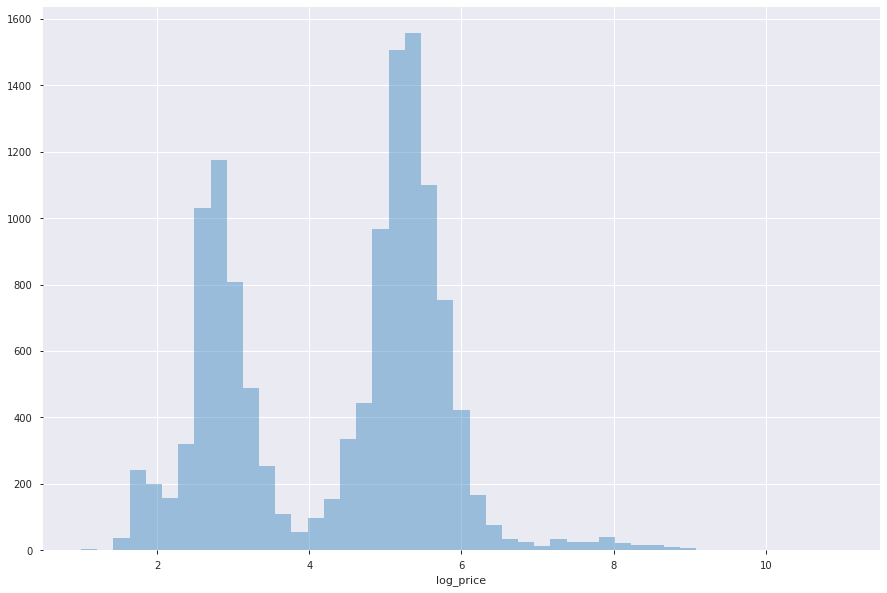

In [36]:
plt.figure(figsize=(15,10))
sns.distplot(data.log_price,kde=False)

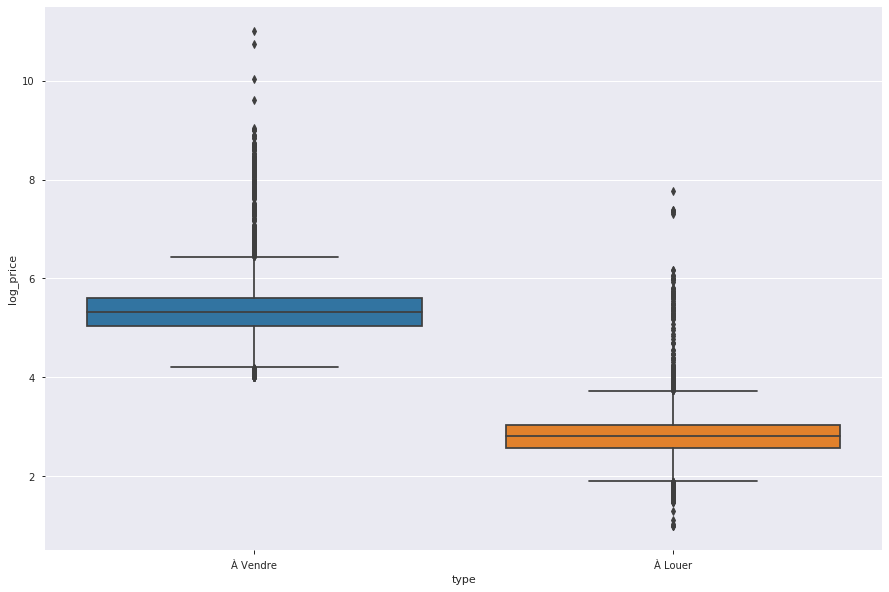

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x='type',y='log_price', data=data)

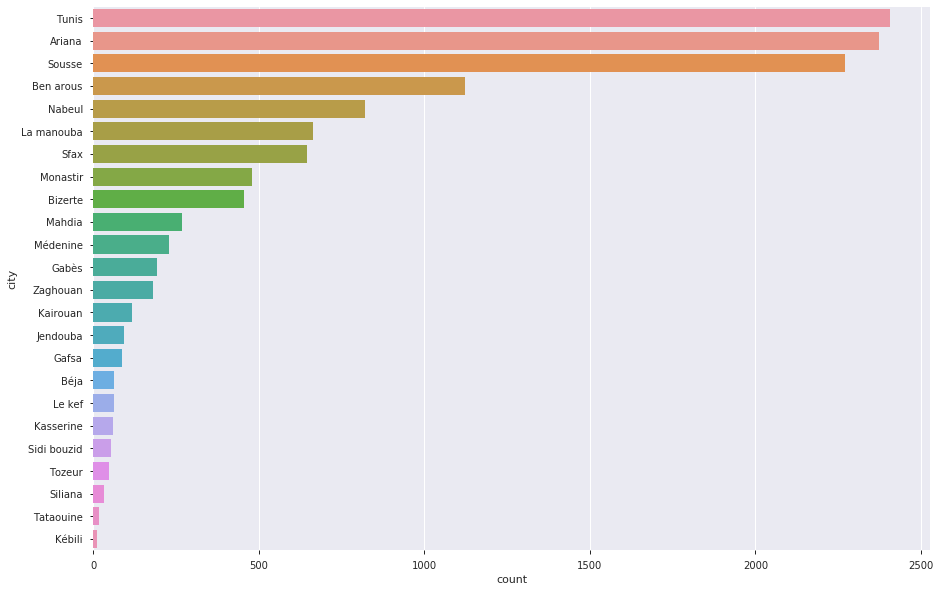

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(y='city', data=data, order=data.city.value_counts().index)

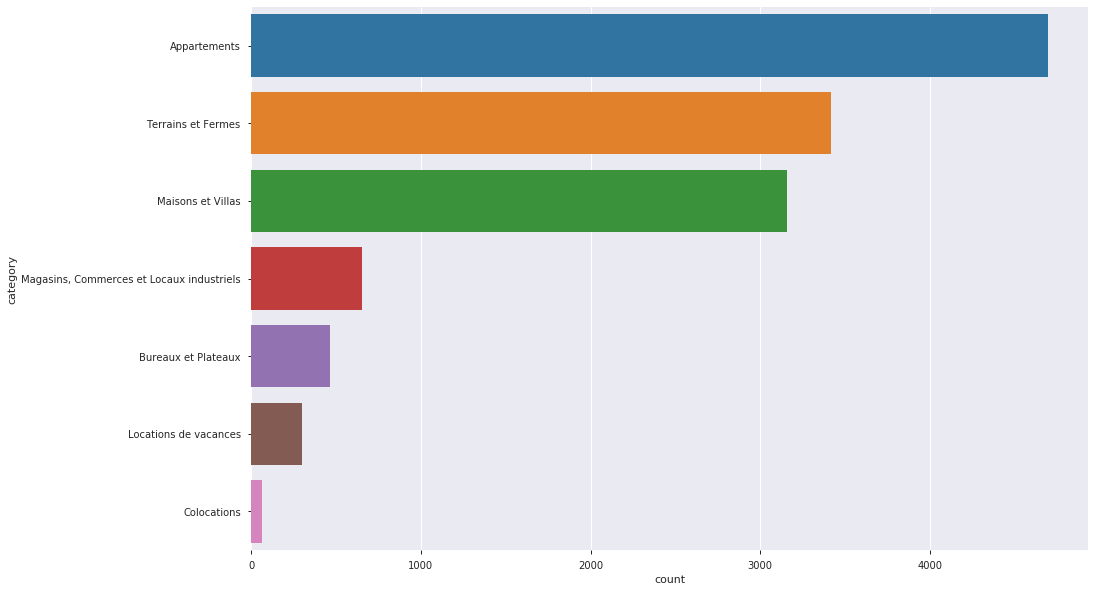

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(y='category', data=data, order=data.category.value_counts().index)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


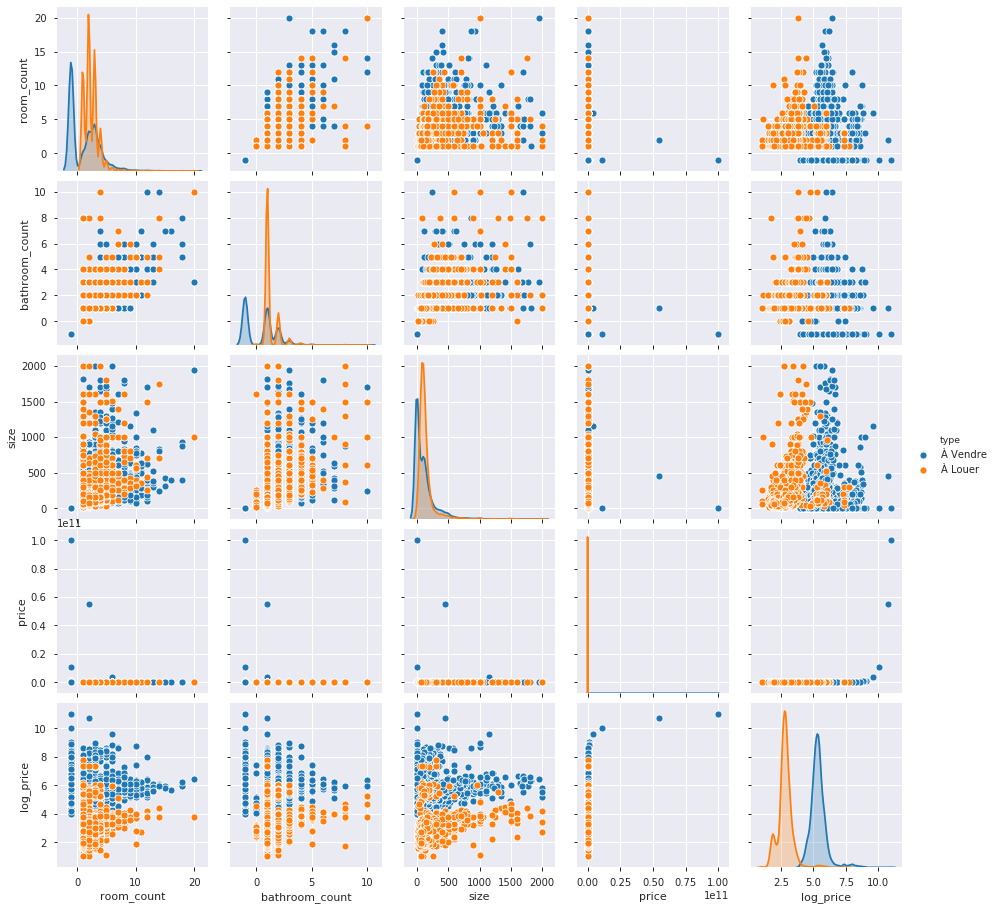

In [40]:
sns.pairplot(data, hue='type')

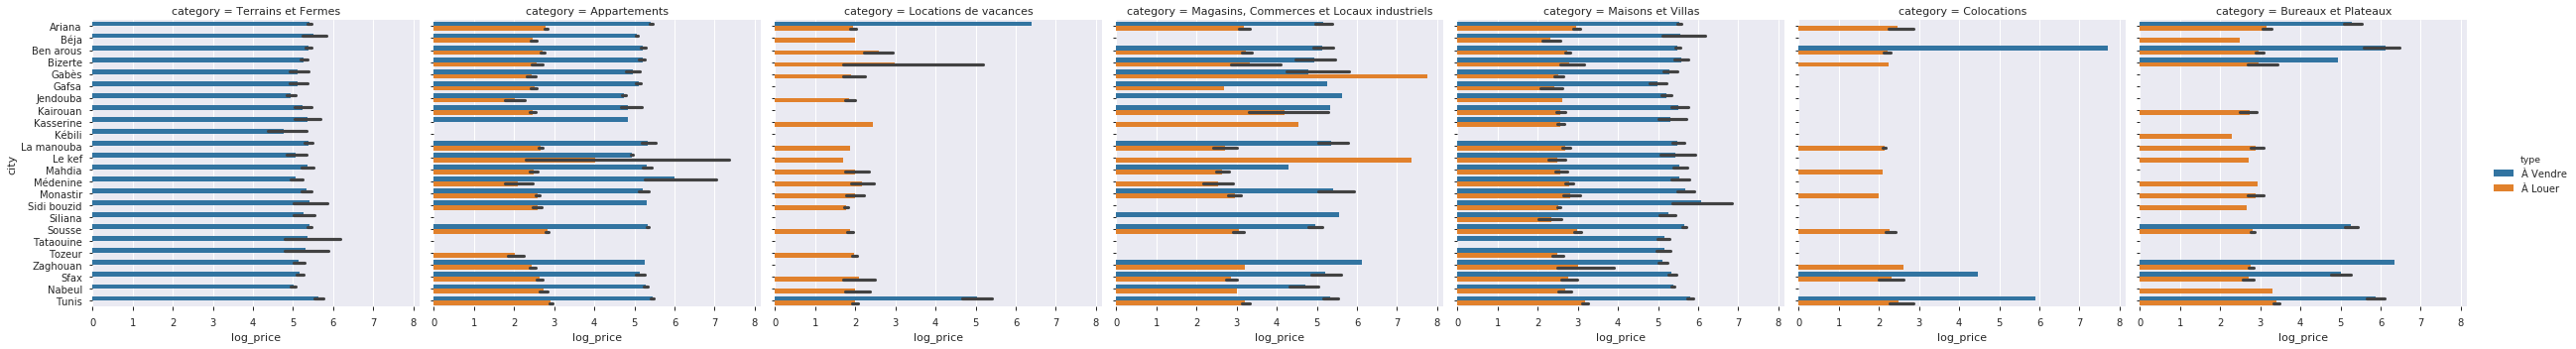

In [41]:
sns.factorplot(data=data,x='log_price', y='city', hue='type', col='category',kind='bar')